<a href="https://colab.research.google.com/github/bombermal/Bootcamp_Data_Science_Aplicada_Alura_2020/blob/main/Desafio_Modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo

Nesse trabalho fiz uma breve explora√ß√£o de dados de Covid-19, busquei entender que informa√ß√µes importantes poderiamos tirar dos arquivos utilizados assim como que poss√≠veis respostas poderiamos alcan√ßar. 

# Introdu√ß√£o
Comecei tentando analisar o arquivo de √≥bitos disponibilisado no GitHub da Alura, por√©m n√£o consegui chegar a conclus√µes que considerei interessantes. Tentei utilizar outros dados do *World Bank* [link] https://www.worldbank.org, mas n√£o consegui relaciona-los de maneira eficiente. Por essa raz√£o, resolvi voltar ao in√≠cio e tratar os dados de covid, tamb√©m dispon√≠veis no GitHub da Aluna, conforme o link disponibilizado acima.

# Metodologia
Busquei estruturar o trabalho de uma maneira que o leitor consiga acompanhar minha linha de racioc√≠nio e entender como cheguei a determinadas conclus√µes e/ou hip√≥teses.

# Bibliotecas

Bibliotecas utilizadas nessa an√°lise

- Organiza√ß√£o dos dados:
  - Pandas
- Visualiza√ß√£o dos dados:
  - Seaborn
  - Matplotlib.pyplot
- Visualiza√ß√£o de dados faltantes  
  - Missingno
- Express√µes regulares
  - Re

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno

# Carregamento dos dados

In [ ]:
#Montar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Science Aplicada - 2020/M1/db_desafio_1/"
#Carregar csv
dataRaw = pd.read_csv(path+"caso.csv") #data da obten√ß√£o do dado no site do Brasil.IO - 08/01/21
#Observar a tabela carregada
dataRaw.head()

date state  ... confirmed_per_100k_inhabitants death_rate
0  2020-12-31    AP  ...                     7914.03305     0.0136
1  2020-12-30    AP  ...                     7856.12917     0.0136
2  2020-12-29    AP  ...                     7821.66533     0.0135
3  2020-12-28    AP  ...                     7791.95914     0.0135
4  2020-12-27    AP  ...                     7742.64220     0.0135

[5 rows x 13 columns]

# An√°lise e prepara√ß√£o dos dados

A seguir verifico dados faltantes e vejo que tipo de pr√© processamento dos dados se faz necess√°rio

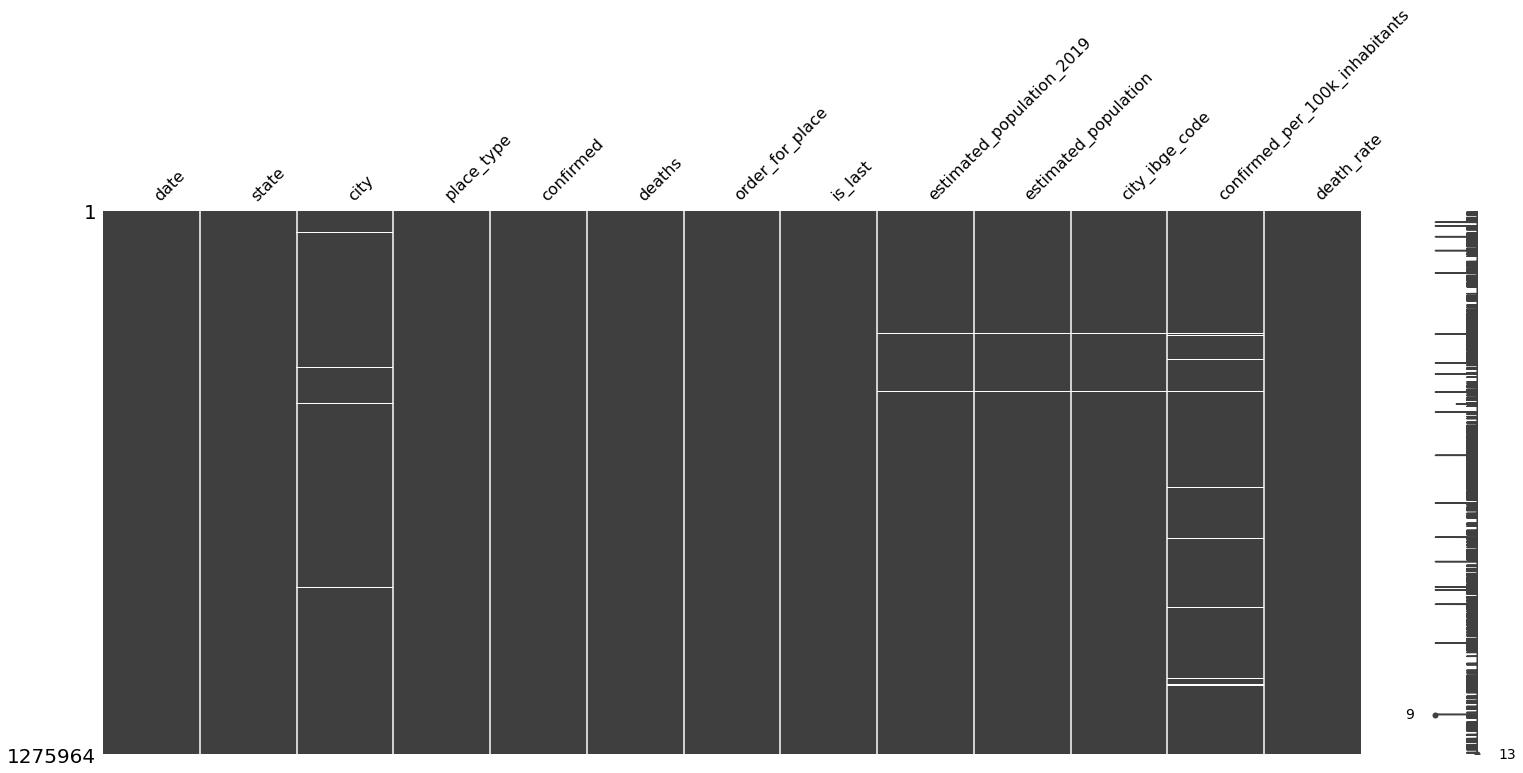

In [ ]:
#Observando dados faltantes
msno.matrix(dataRaw)

# Pr√© processamento

Como percebemos anteriormente, encontramos alguns dados faltantes na tabela carregada. Optei por subistitu√≠los no lugar de remove-los. As colunas com n√∫meros faltantes foram preenchidas com **0** e na coluna **city** n√£o h√° nome sempre que o dado registrado se refere ao estado, sendo assim, resolvi preench√™-lo com **estado**.

## 1 - Remo√ß√£o de valores faltantes

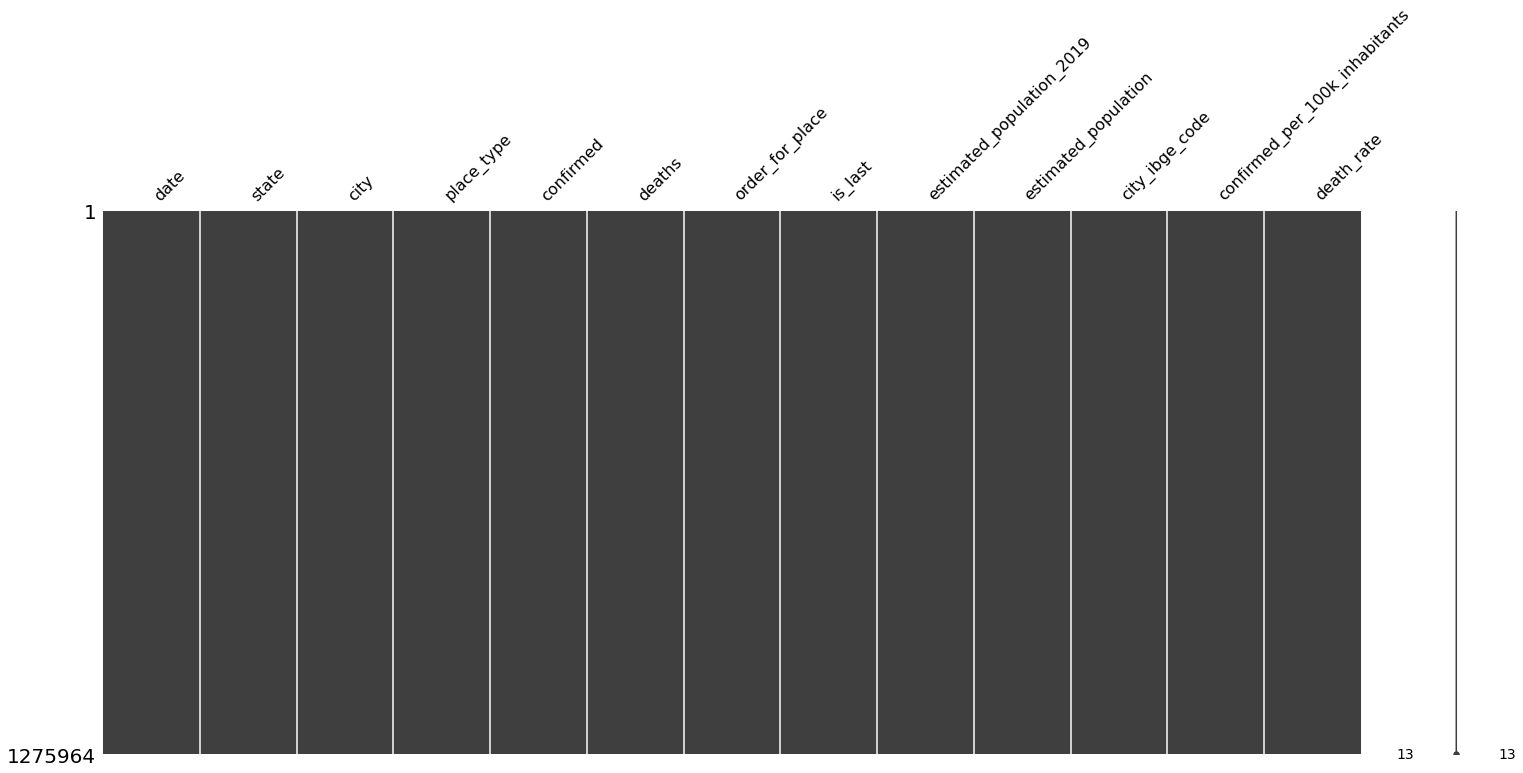

In [ ]:
#Substitui√ß√£o dos valores num√©ricos faltantes
dataRaw.loc[:,"place_type":] = dataRaw.loc[:,"place_type":].fillna(0)
#Subistitui√ß√£o dos valores nominais faltantes
dataRaw.city = dataRaw.city.fillna("estado")
#Matrix de dados faltantes
msno.matrix(dataRaw)

## 2 - Checar os tipos das colunas

In [ ]:
#Checando os tipos das colunas
dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275964 entries, 0 to 1275963
Data columns (total 13 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   date                            1275964 non-null  object 
 1   state                           1275964 non-null  object 
 2   city                            1275964 non-null  object 
 3   place_type                      1275964 non-null  object 
 4   confirmed                       1275964 non-null  int64  
 5   deaths                          1275964 non-null  int64  
 6   order_for_place                 1275964 non-null  int64  
 7   is_last                         1275964 non-null  bool   
 8   estimated_population_2019       1275964 non-null  float64
 9   estimated_population            1275964 non-null  float64
 10  city_ibge_code                  1275964 non-null  float64
 11  confirmed_per_100k_inhabitants  1275964 non-null  float64
 12  

## 3 - Corrigir os tipos das colunas

In [ ]:
#Convertendo as colunas para os tipos corretos e 'date' para datetime
dataRaw = dataRaw.convert_dtypes(convert_integer=False,infer_objects=False)
dataRaw.date = pd.to_datetime(dataRaw.date)
dataRaw[["confirmed", "deaths"]] =dataRaw[["confirmed", "deaths"]].astype("float64")

## 4 - Separa√ß√£o dos dados
Criando mais uma tabela com dados dos estados esclusivamente

In [ ]:
dataStates = dataRaw[dataRaw.place_type == "state"].copy()
dataStates.head()

date state  ... confirmed_per_100k_inhabitants death_rate
0 2020-12-31    AP  ...                     7914.03305     0.0136
1 2020-12-30    AP  ...                     7856.12917     0.0136
2 2020-12-29    AP  ...                     7821.66533     0.0135
3 2020-12-28    AP  ...                     7791.95914     0.0135
4 2020-12-27    AP  ...                     7742.64220     0.0135

[5 rows x 13 columns]

# An√°lise

## 1 - Descri√ß√£o das colunas

Esse trecho foi recortado do github onde os dados do covid est√£o armazenados, logo a baixo temos a descri√ß√£o das colunas no arquivo.

---

N√∫mero de casos confirmados e √≥bitos por munic√≠pio por dia, segundo as
Secretarias Estaduais de Sa√∫de.

- API: https://brasil.io/api/dataset/covid19/caso/data
- Dados completos para download: https://data.brasil.io/dataset/covid19/caso.csv.gz

Colunas:

- üîç `search`: passe algum valor para executar a busca por texto completo, que
  compreende algumas das colunas da tabela.
- üîç `date`: data de coleta dos dados no formato YYYY-MM-DD.
- üîç `state`: sigla da unidade federativa, exemplo: SP.
- üîç `city`: nome do munic√≠pio (pode estar em branco quando o registro √©
  referente ao estado, pode ser preenchido com `Importados/Indefinidos`
  tamb√©m).
- üîç `place_type`: tipo de local que esse registro descreve, pode ser `city` ou
  `state`.
- üîç `order_for_place`: n√∫mero que identifica a ordem do registro para este
  local. O registro referente ao primeiro boletim em que esse local aparecer
  ser√° contabilizado como `1` e os demais boletins incrementar√£o esse valor.
- üîç `is_last`: campo pr√©-computado que diz se esse registro √© o mais novo para
  esse local, pode ser `True` ou `False` (caso filtre por esse campo, use
  `is_last=True` ou `is_last=False`, **n√£o use o valor em min√∫sculas**).
- üîç `city_ibge_code`: c√≥digo IBGE do local.
- `confirmed`: n√∫mero de casos confirmados.
- `deaths`: n√∫mero de mortes.
- `estimated_population`: popula√ß√£o estimada para esse munic√≠pio/estado em
  2020, [segundo o
  IBGE](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados).
  ([acesse o script que faz o download e convers√£o dos dados de
  popula√ß√£o](https://github.com/turicas/censo-ibge)).
- `estimated_population_2019`: popula√ß√£o estimada para esse munic√≠pio/estado em
  2019, [segundo o
  IBGE](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados).
  **ATEN√á√ÉO**: essa coluna possui valores desatualizados, prefira usar a coluna
  `estimated_population`.
- `confirmed_per_100k_inhabitants`: n√∫mero de casos confirmados por 100.000
  habitantes (baseado em `estimated_population`).
- `death_rate`: taxa de mortalidade (mortes / confirmados).

üîç = colunas que podem ser filtrados via query string na API e na interface.

---

## 2 - Entender que tipo de valores est√£o presentes na tabela.

O intuito aqui √© entender o que h√° na tabela, e posteriormente criar hip√≥teses a serem respondidas

In [ ]:
def plotBy(df,rows,cols,filterCondition,x,y,sharex=True,sharey=True,hue=False,hueName="",figsize=(20,20)):
  """
    fun√ß√£o criada para plotar grades de gr√°ficos 
    df: DataFrame
      DataFrame com dados a serem utilizados
    rows: int
      N√∫mero de linhas da grade
    cols: int
      N√∫mero de colunas da grade
    filterCondition: string
      Coluna que ser√° utilizada como base para a separa√ß√£o de cada gr√°fico
    x/y: string
      Nome da coluna que ser√° utilizada como eixo x/y
    sharex/y: bool
      Identifica se os gr√°ficos compartilhar√£o os eixos x e y
  """
  conditionList = df[filterCondition].unique()

  #tamanho da grade de gr√°ficos, colunas e linhas
  nrows=rows
  ncols=cols
  fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize,tight_layout=True, sharey=sharey,sharex=sharex)

  row = 0
  for col, ii in enumerate(conditionList):
    #mascara com o filtro aplicado no DataFrame
    mask = df[filterCondition] == ii
    if hue:
      sns.lineplot(data=df[mask], x="date", y=y, hue=hueName, ax=axes[row%nrows,col%ncols])
    else:
      sns.lineplot(data=df[mask], x="date", y=y, ax=axes[row%nrows,col%ncols])
    #Cosm√©ticos: Despine, formato dos n√∫meros e t√≠tulo
    sns.despine(top=True, right=True, ax=axes[row%nrows,col%ncols])
    axes[row%nrows,col%ncols].ticklabel_format(style='plain', axis='y')
    axes[row%nrows,col%ncols].set_title(ii)
      
    if col%ncols==ncols-1:
        row +=1
    
    plt.setp(axes[row%nrows,col%ncols].get_xticklabels(), rotation=45)

### I - Death_rate
Coluna que representa a taxa de morte registrada

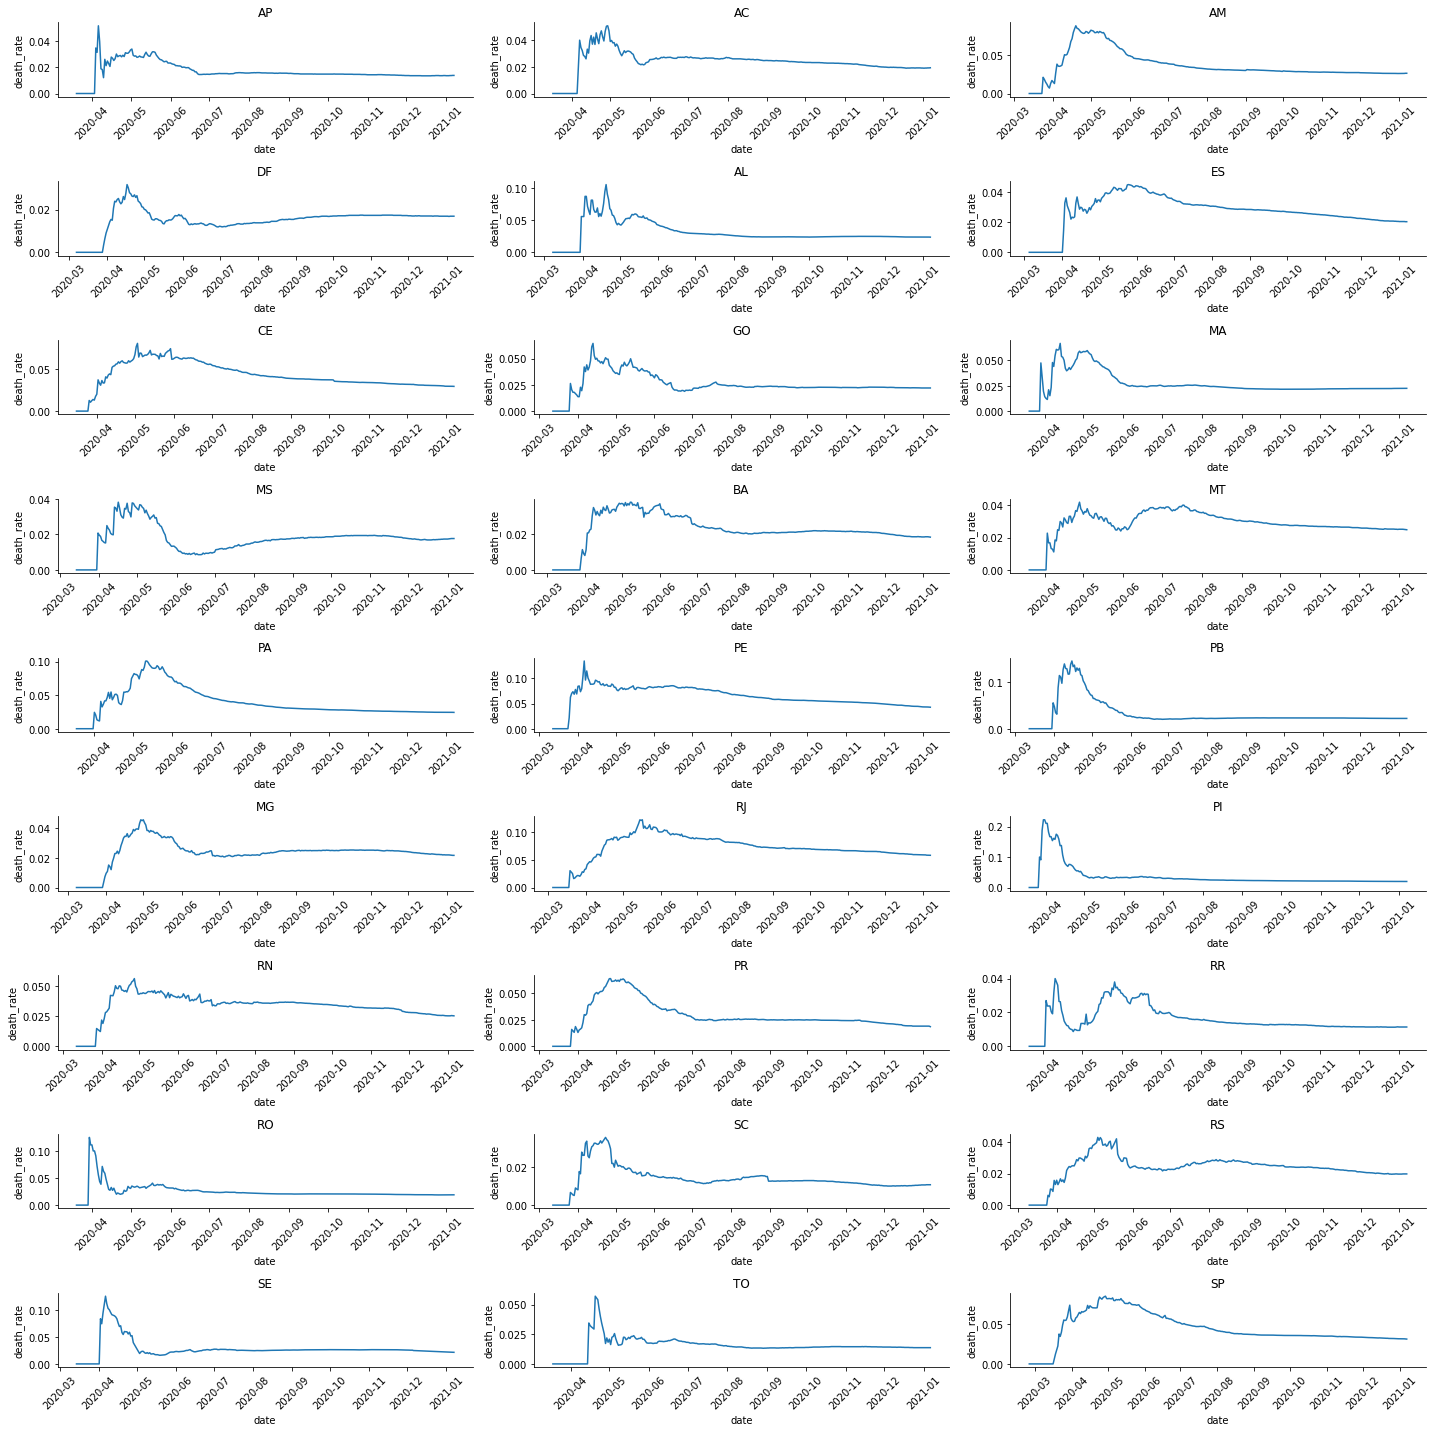

In [ ]:
#Vis√£o geral da taxa de mortes por estado       
plotBy(dataStates, 9, 3, "state", "date", "death_rate", False, False)

### II - Confirmed
N√∫mero de casos confirmados

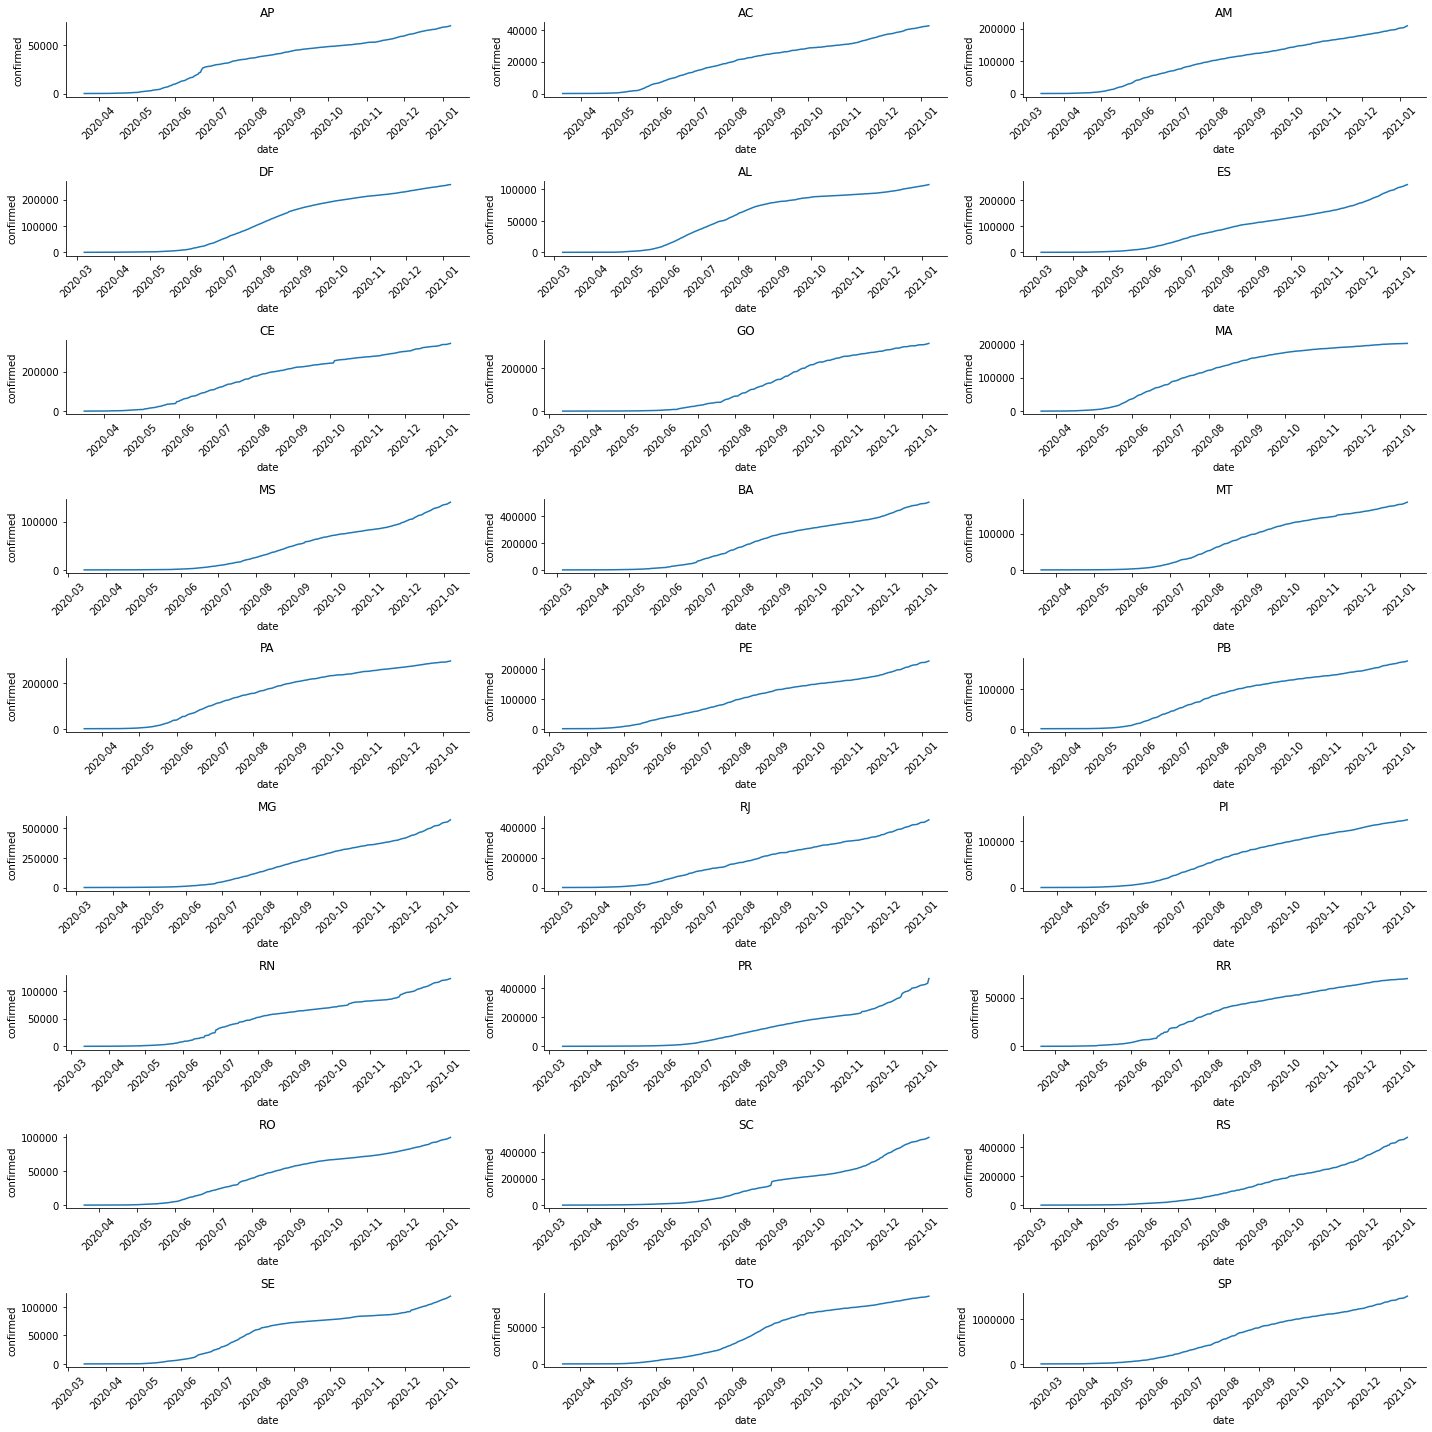

In [ ]:
#Vis√£o geral casos confirmados por estado
plotBy(dataStates, 9, 3, "state", "date", "confirmed", False, False)

### III - Deaths
N√∫mero de mortes registradas

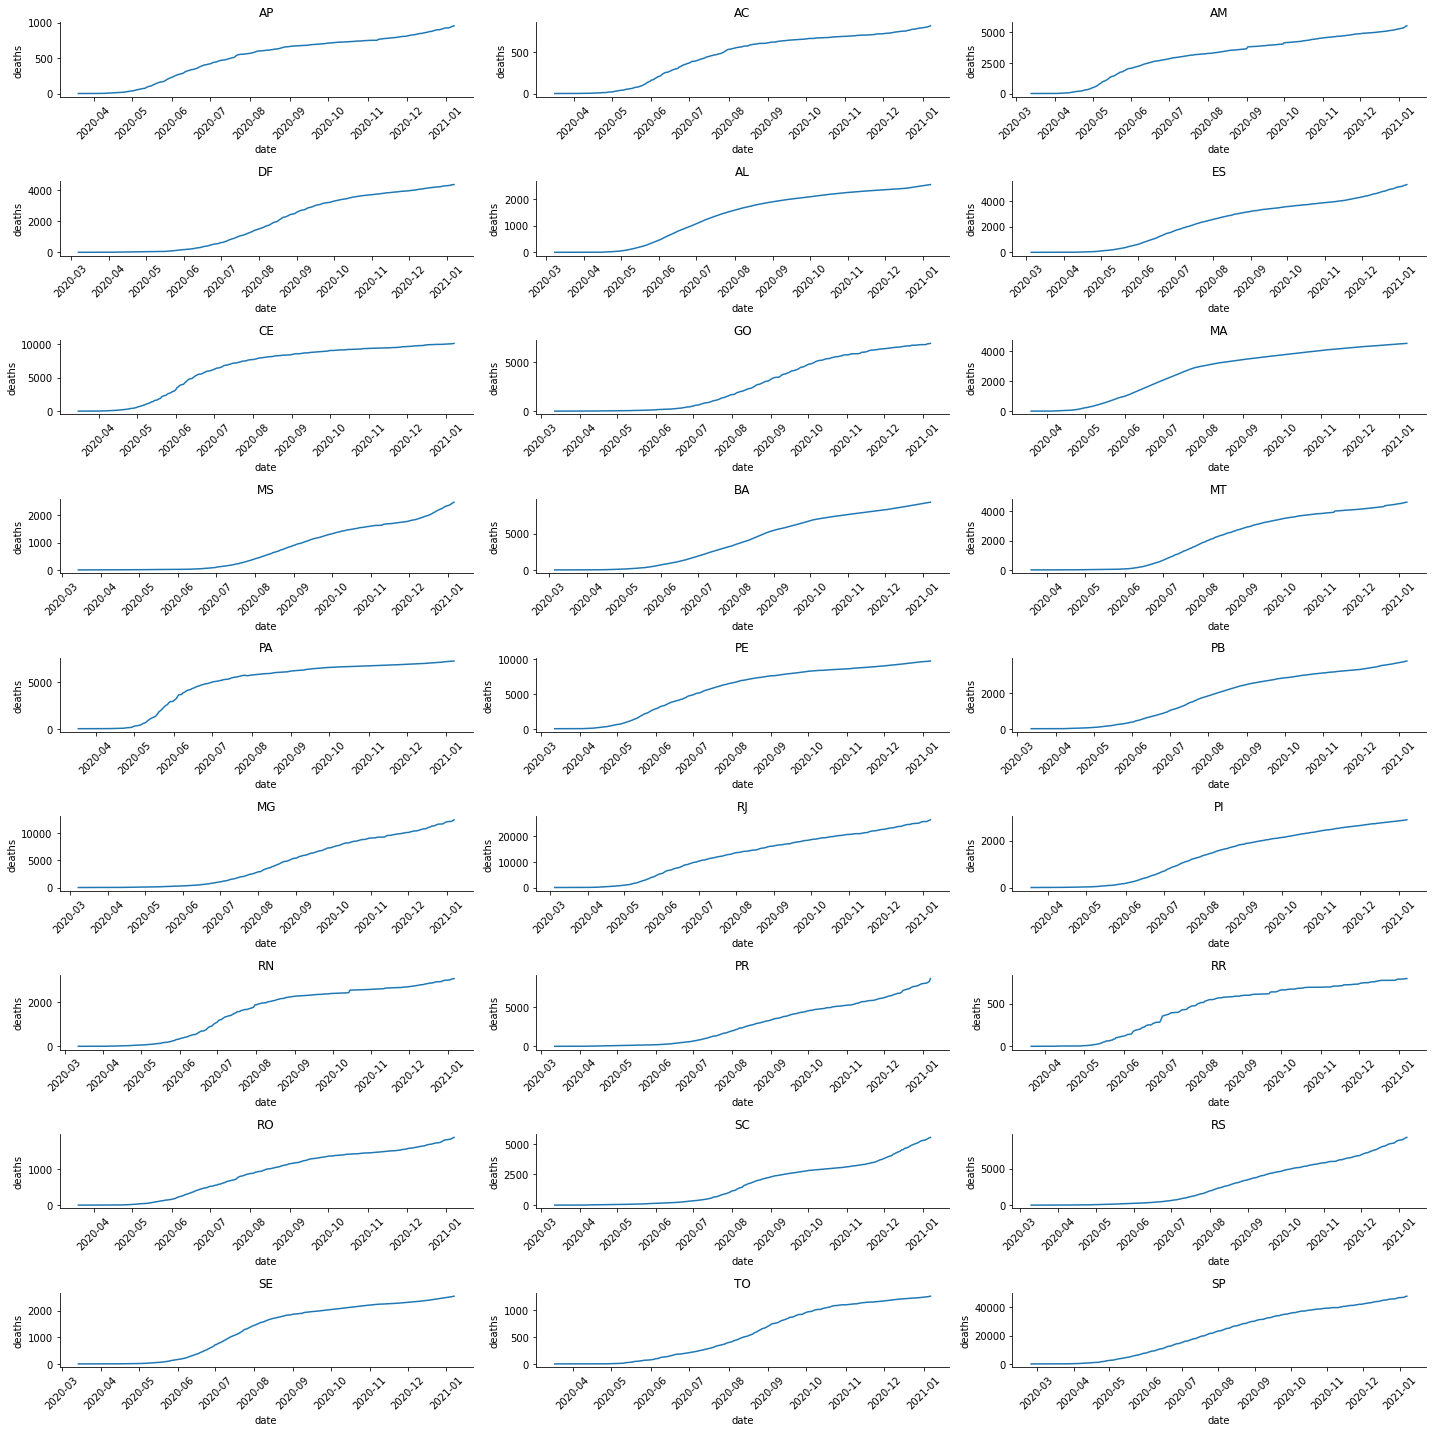

In [ ]:
#Vis√£o geral de mortes por estado
plotBy(dataStates, 9, 3, "state", "date","deaths", False, False)

### IV - Confirmed_per_100k_inhabitants
N√∫mero de casos confirmados para cada 100 mil habitantes

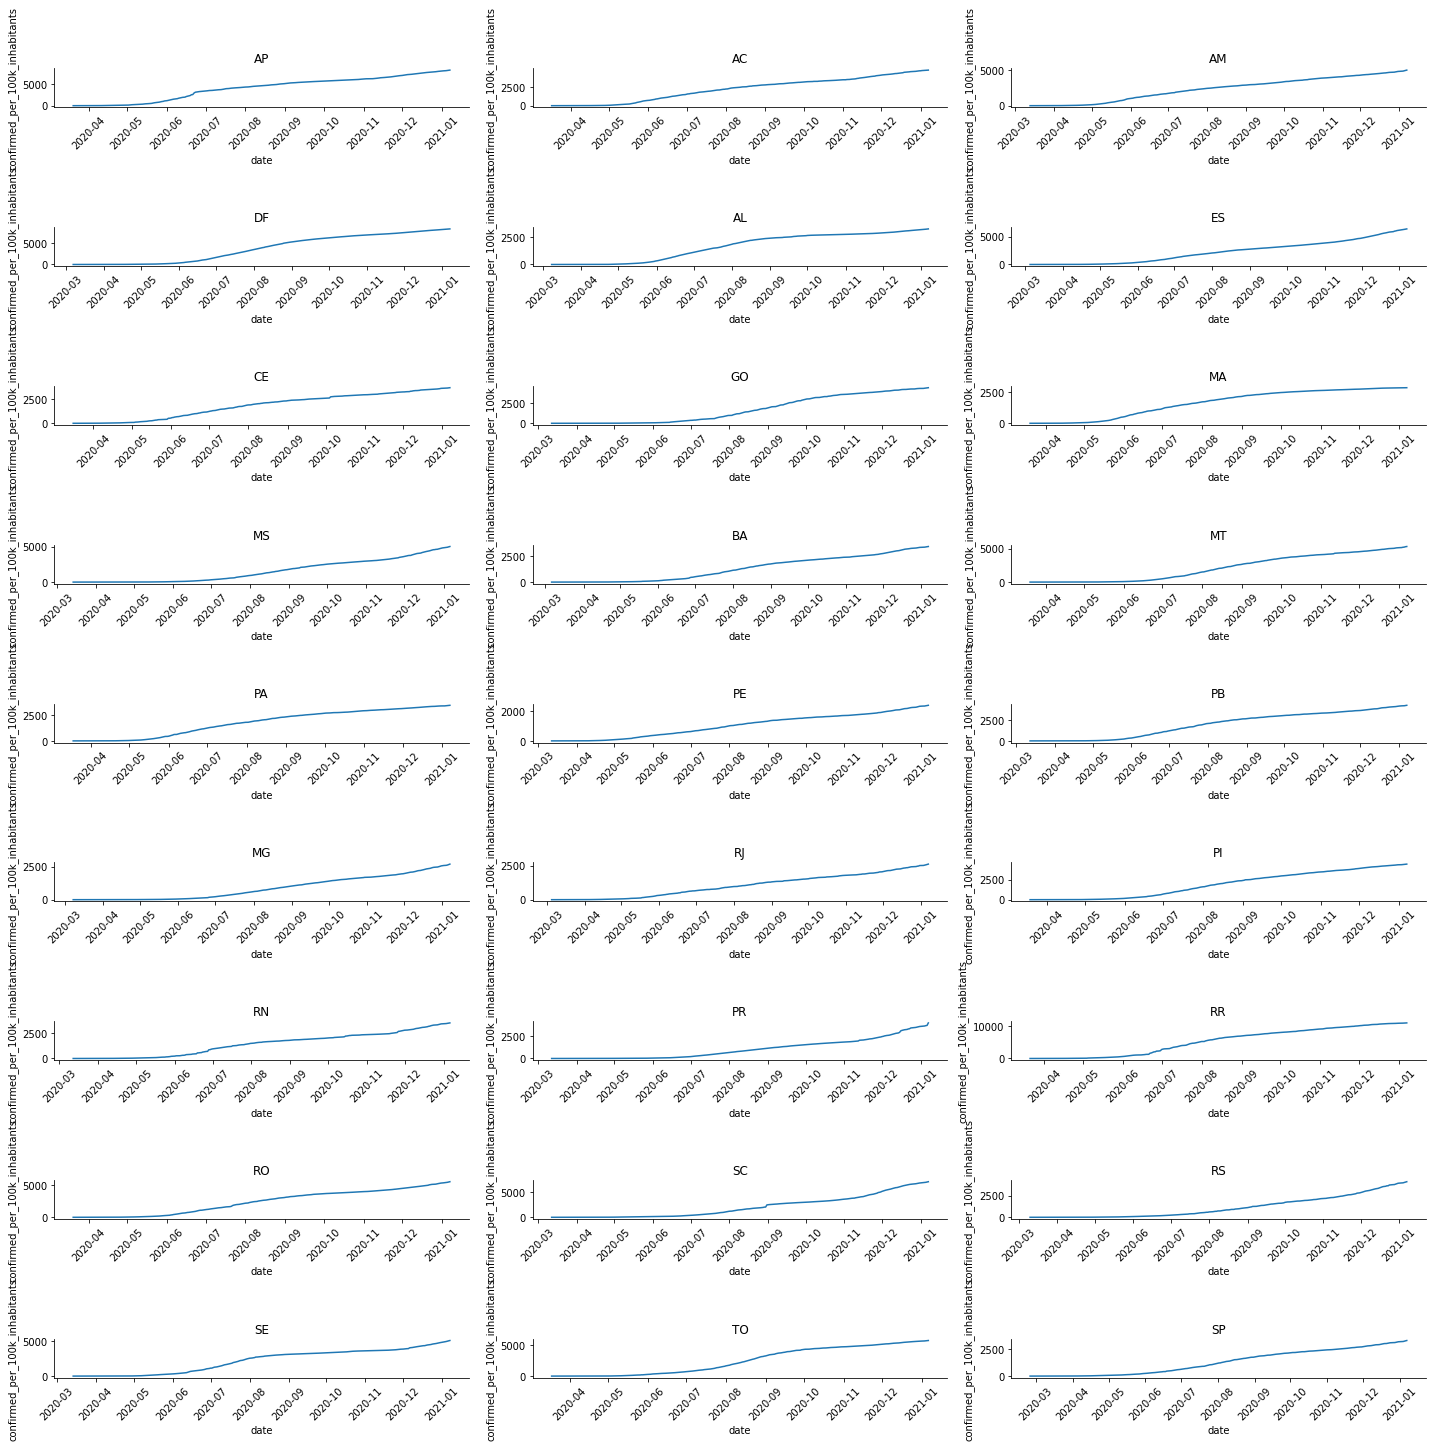

In [ ]:
#Vis√£o geral casos confirmados a cada 100 mil habitantes por estado
plotBy(dataStates, 9, 3, "state", "date","confirmed_per_100k_inhabitants", False, False)

### V - Conclus√£o parcial
Ao gerar gr√°ficos mostrando cada estado separadamente, percebi uma certa dificuldade em comparar os estados e tentar buscar poss√≠veis rela√ß√µes e e construir hip√≥teses que se mostrem interessantes, por essa raz√£o, logo a seguir, agruparei os estados por regi√µes. Veremos o que isso pode nos oferecer.


## 3 - Agrupar por regi√µes

A partir de um dicion√°rio, crio uma coluna que *'etiqueta'* cada linha de registro com sua respectiva regi√£o.

In [ ]:
#Agrupar estados por regi√µes

regionsDict = {'AM': "Norte", 'BA': "Nordeste", 'CE': "Nordeste", 'DF': "Centro-Oeste", 'ES': "Sudeste", 'GO': "Centro-Oeste", 'MA': "Nordeste", 'MS': "Centro-Oeste", 
                'MG': "Sudeste", 'PB': "Nordeste", 'PR': "Sul", 'PE': "Nordeste", 'PI': "Nordeste",'RJ': "Sudeste", 'RN': "Nordeste", 'RS': "Sul", 'SC': "Sul",
                'SP': "Sudeste", 'SE': "Nordeste", 'AL': "Nordeste", 'AC': "Norte", 'AP': "Norte", 'TO': "Norte", 'PA': "Norte", 'MT': "Centro-Oeste", 'RO': "Norte",
                'RR': "Norte"}

dataStates["region"] = dataStates.state.apply(lambda x: regionsDict[x])
dataStates.head()

date state    city  ... confirmed_per_100k_inhabitants  death_rate  region
0 2020-12-31    AP  estado  ...                     7914.03305      0.0136   Norte
1 2020-12-30    AP  estado  ...                     7856.12917      0.0136   Norte
2 2020-12-29    AP  estado  ...                     7821.66533      0.0135   Norte
3 2020-12-28    AP  estado  ...                     7791.95914      0.0135   Norte
4 2020-12-27    AP  estado  ...                     7742.64220      0.0135   Norte

[5 rows x 14 columns]

### I - Death_rate
Coluna que representa a taxa de morte registrada

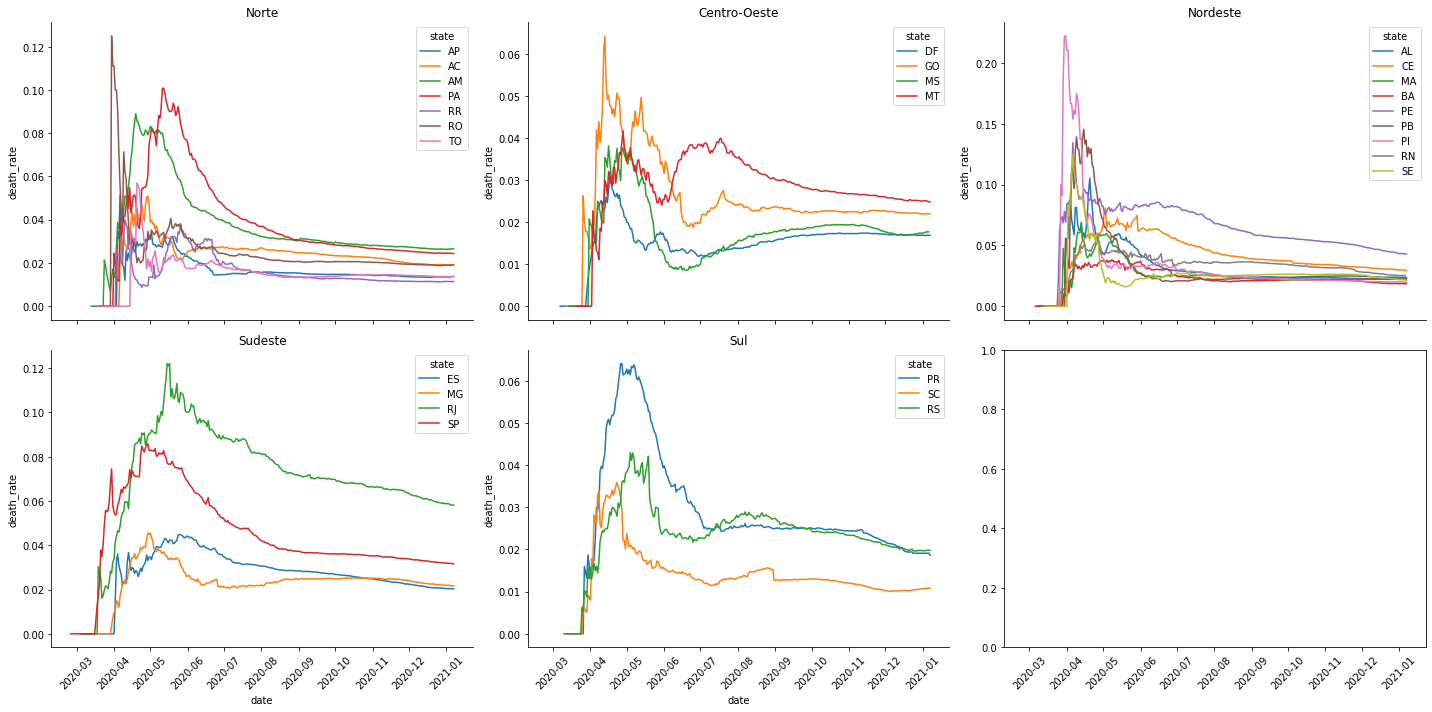

In [ ]:
plotBy(dataStates, 2, 3, "region", "date","death_rate", True, False, True, "state",(20,10))

### II - Confirmed
N√∫mero de casos confirmados

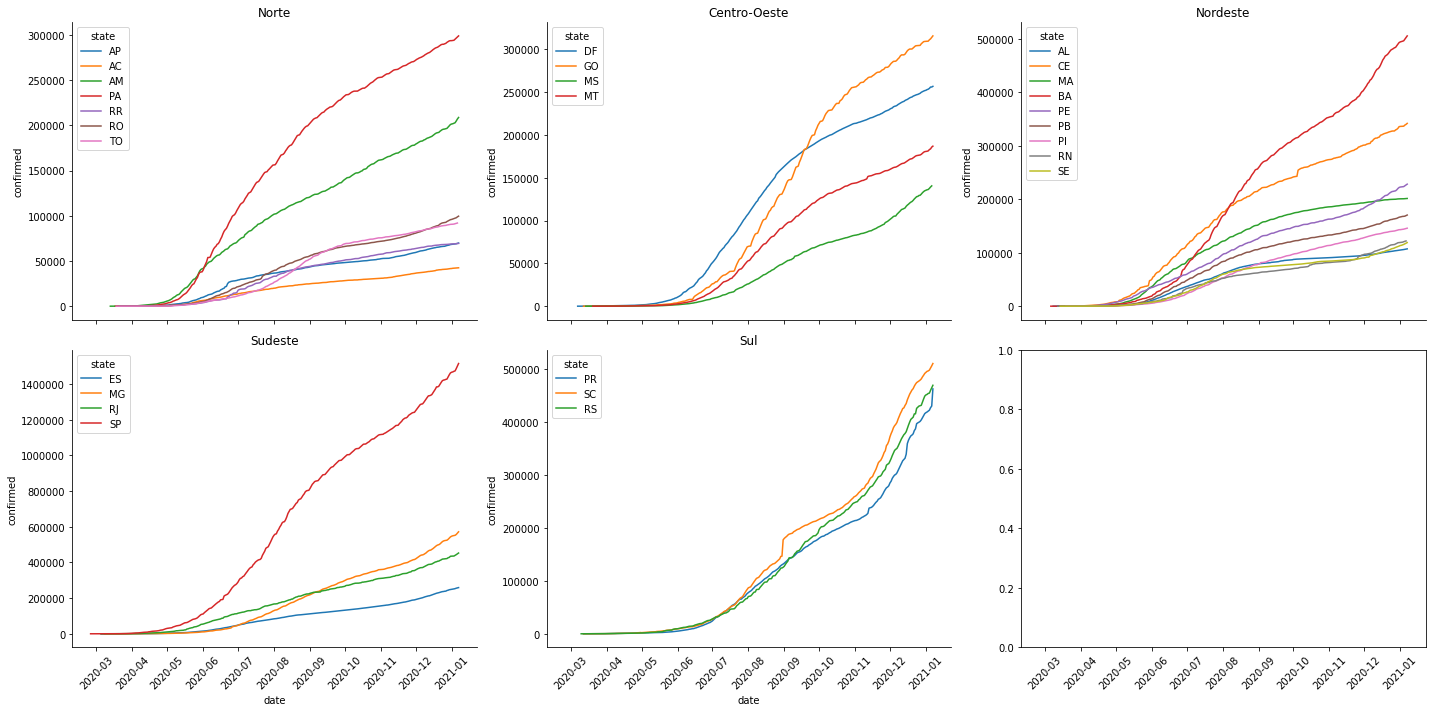

In [ ]:
plotBy(dataStates, 2, 3, "region", "date","confirmed", True, False, True, "state",(20,10))

### III - Deaths
N√∫mero de mortes registradas

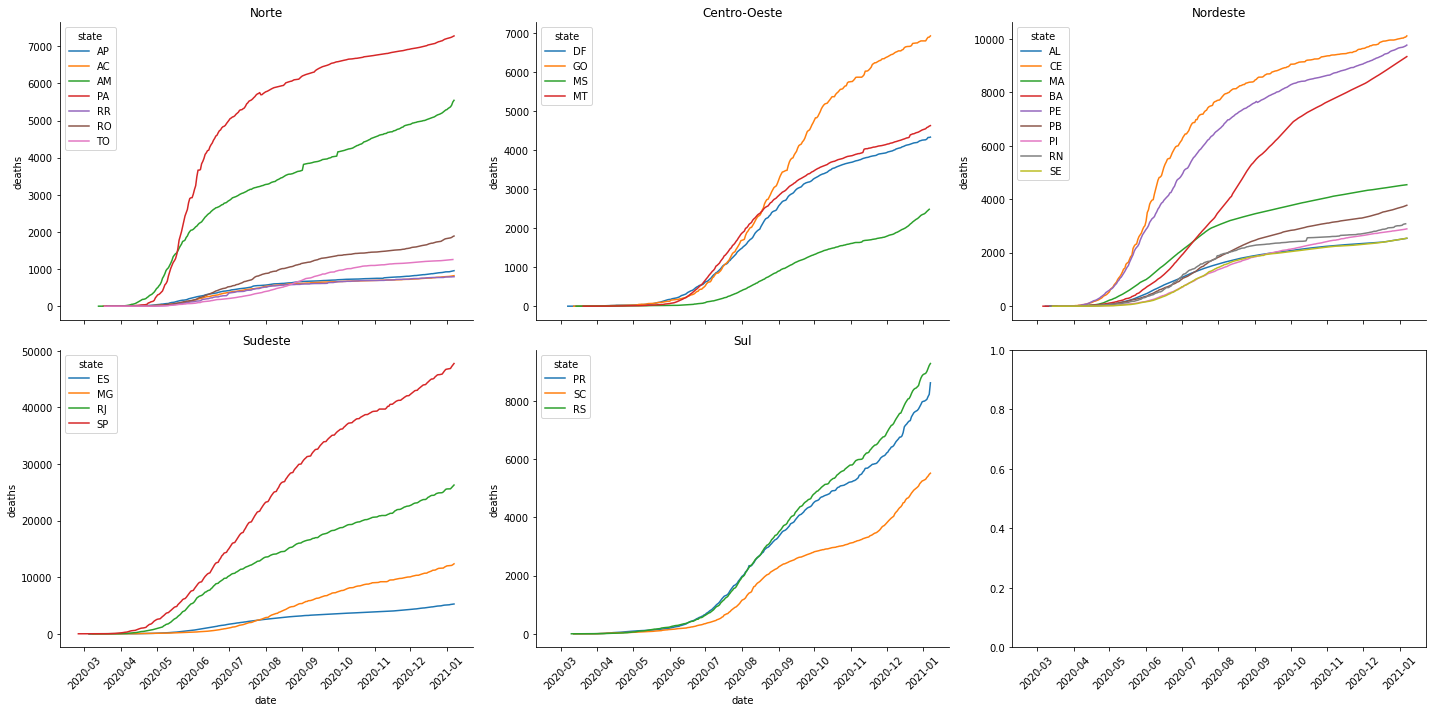

In [ ]:
plotBy(dataStates, 2, 3, "region", "date","deaths", True, False, True, "state",(20,10))

### IV - Confirmed_per_100k_inhabitants
N√∫mero de casos confirmados para cada 100 mil habitantes

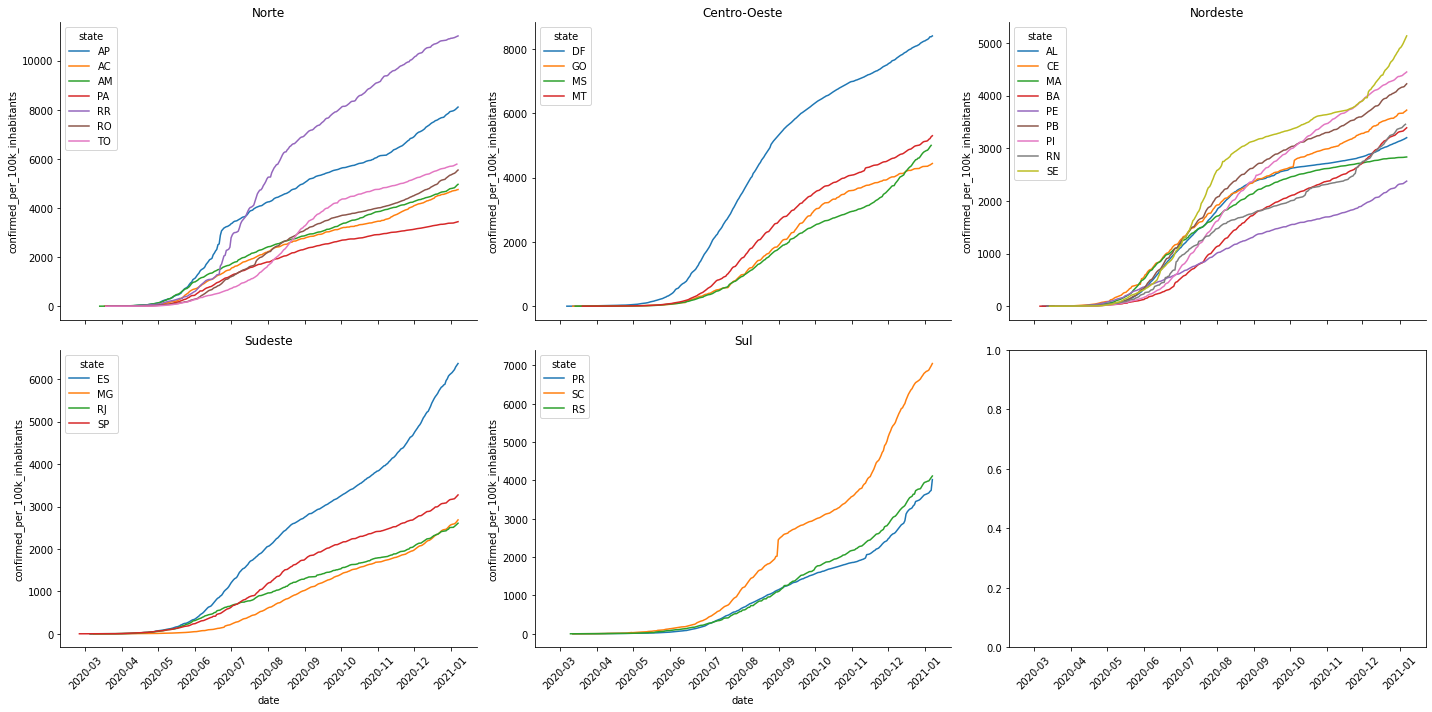

In [ ]:
plotBy(dataStates, 2, 3, "region", "date","confirmed_per_100k_inhabitants", True, False, True, "state",(20,10))

### V - Conclus√£o parcial
Com essa an√°lise separada por regi√µes, conseguimos ver de maneira mais interessante algumas poss√≠veis rela√ß√µes entre os dados registrados, por exemplo percebemos que alguns estados acabam se *'destacando'* em cada uma das regi√µes, o que nos tr√°s algumas perguntas.


# Hip√≥teses a serem avaliadas

1. Esses resultados se relacionam com:
  - Tamanho absoluto da popula√ß√£o?
  - Maior densidade demogr√°fica?
  - Maior/menor investimento em sa√∫de?
  - Educa√ß√£o?
  - IDH?
2. Com os dados que tenho, quais perguntas consigo responder:
  - Tamanho absoluto da popula√ß√£o? Sim, coluna *'estimated_population'*
  - Maior densidade demogr√°fica? N√£o, necess√°rio mais informa√ß√µes
  - Maior/menor investimento em sa√∫de? N√£o, necess√°rio mais informa√ß√µes
  - Educa√ß√£o? N√£o, necess√°rio mais informa√ß√µes
  - IDH? N√£o, necess√°rio mais informa√ß√µes

## 1 - Buscando por correla√ß√µes
Como observar a baixo, encontramos uma correla√ß√£o de **0.92** ente o n√∫mero de mortes e casos confirmados. Al√©m de uma correla√ß√£o de **0.60** e **0.67**, respectivamente, entre o tamanho da popula√ß√£o e casos confirmados, casos cinfirmados e mortes. Contudo, acredito que isso seja o esperado, haja vista que se h√° uma popula√ß√£o maior, haver√° um maior n√∫mero de casos confirmados e consequentemente, mais √≥bitos.

O ponto de estranhamento para mim nessa correla√ß√£o foi a *'baixa'* correla√ß√£o entre popula√ß√£o estimada, mortes e confirmados. Apenas *'60%'*. Por√©m acredito que isso aconte√ßa pois n√£o necess√°riamente as cidades maiores tiveram n√∫meros de casos ou √≥bitos. Podemos observar isso nos gr√°ficos gerados anteriormente.

In [ ]:
dataCorr = dataStates[["confirmed", "deaths", "estimated_population_2019", "estimated_population", "confirmed_per_100k_inhabitants", "death_rate","state", "region"]] 
corrMat = dataCorr.corr(method="pearson")
corrMat

confirmed  ...  death_rate
confirmed                        1.000000  ...   -0.002574
deaths                           0.922957  ...    0.198311
estimated_population_2019        0.600850  ...    0.265408
estimated_population             0.601094  ...    0.265141
confirmed_per_100k_inhabitants   0.279181  ...   -0.323958
death_rate                      -0.002574  ...    1.000000

[6 rows x 6 columns]

## 2 - An√°lise do pairplot

Atr√°ves desse *pairplot* conseguimos ver o que discutimos anteriormente na tabela de correla√ß√£o, acrescido de um agrupamento por regi√µes. Como esperado conseguimos ver que as regi√µes mais populosas tamb√©m possuem mais casos confirmados, assim como √≥bitos. 

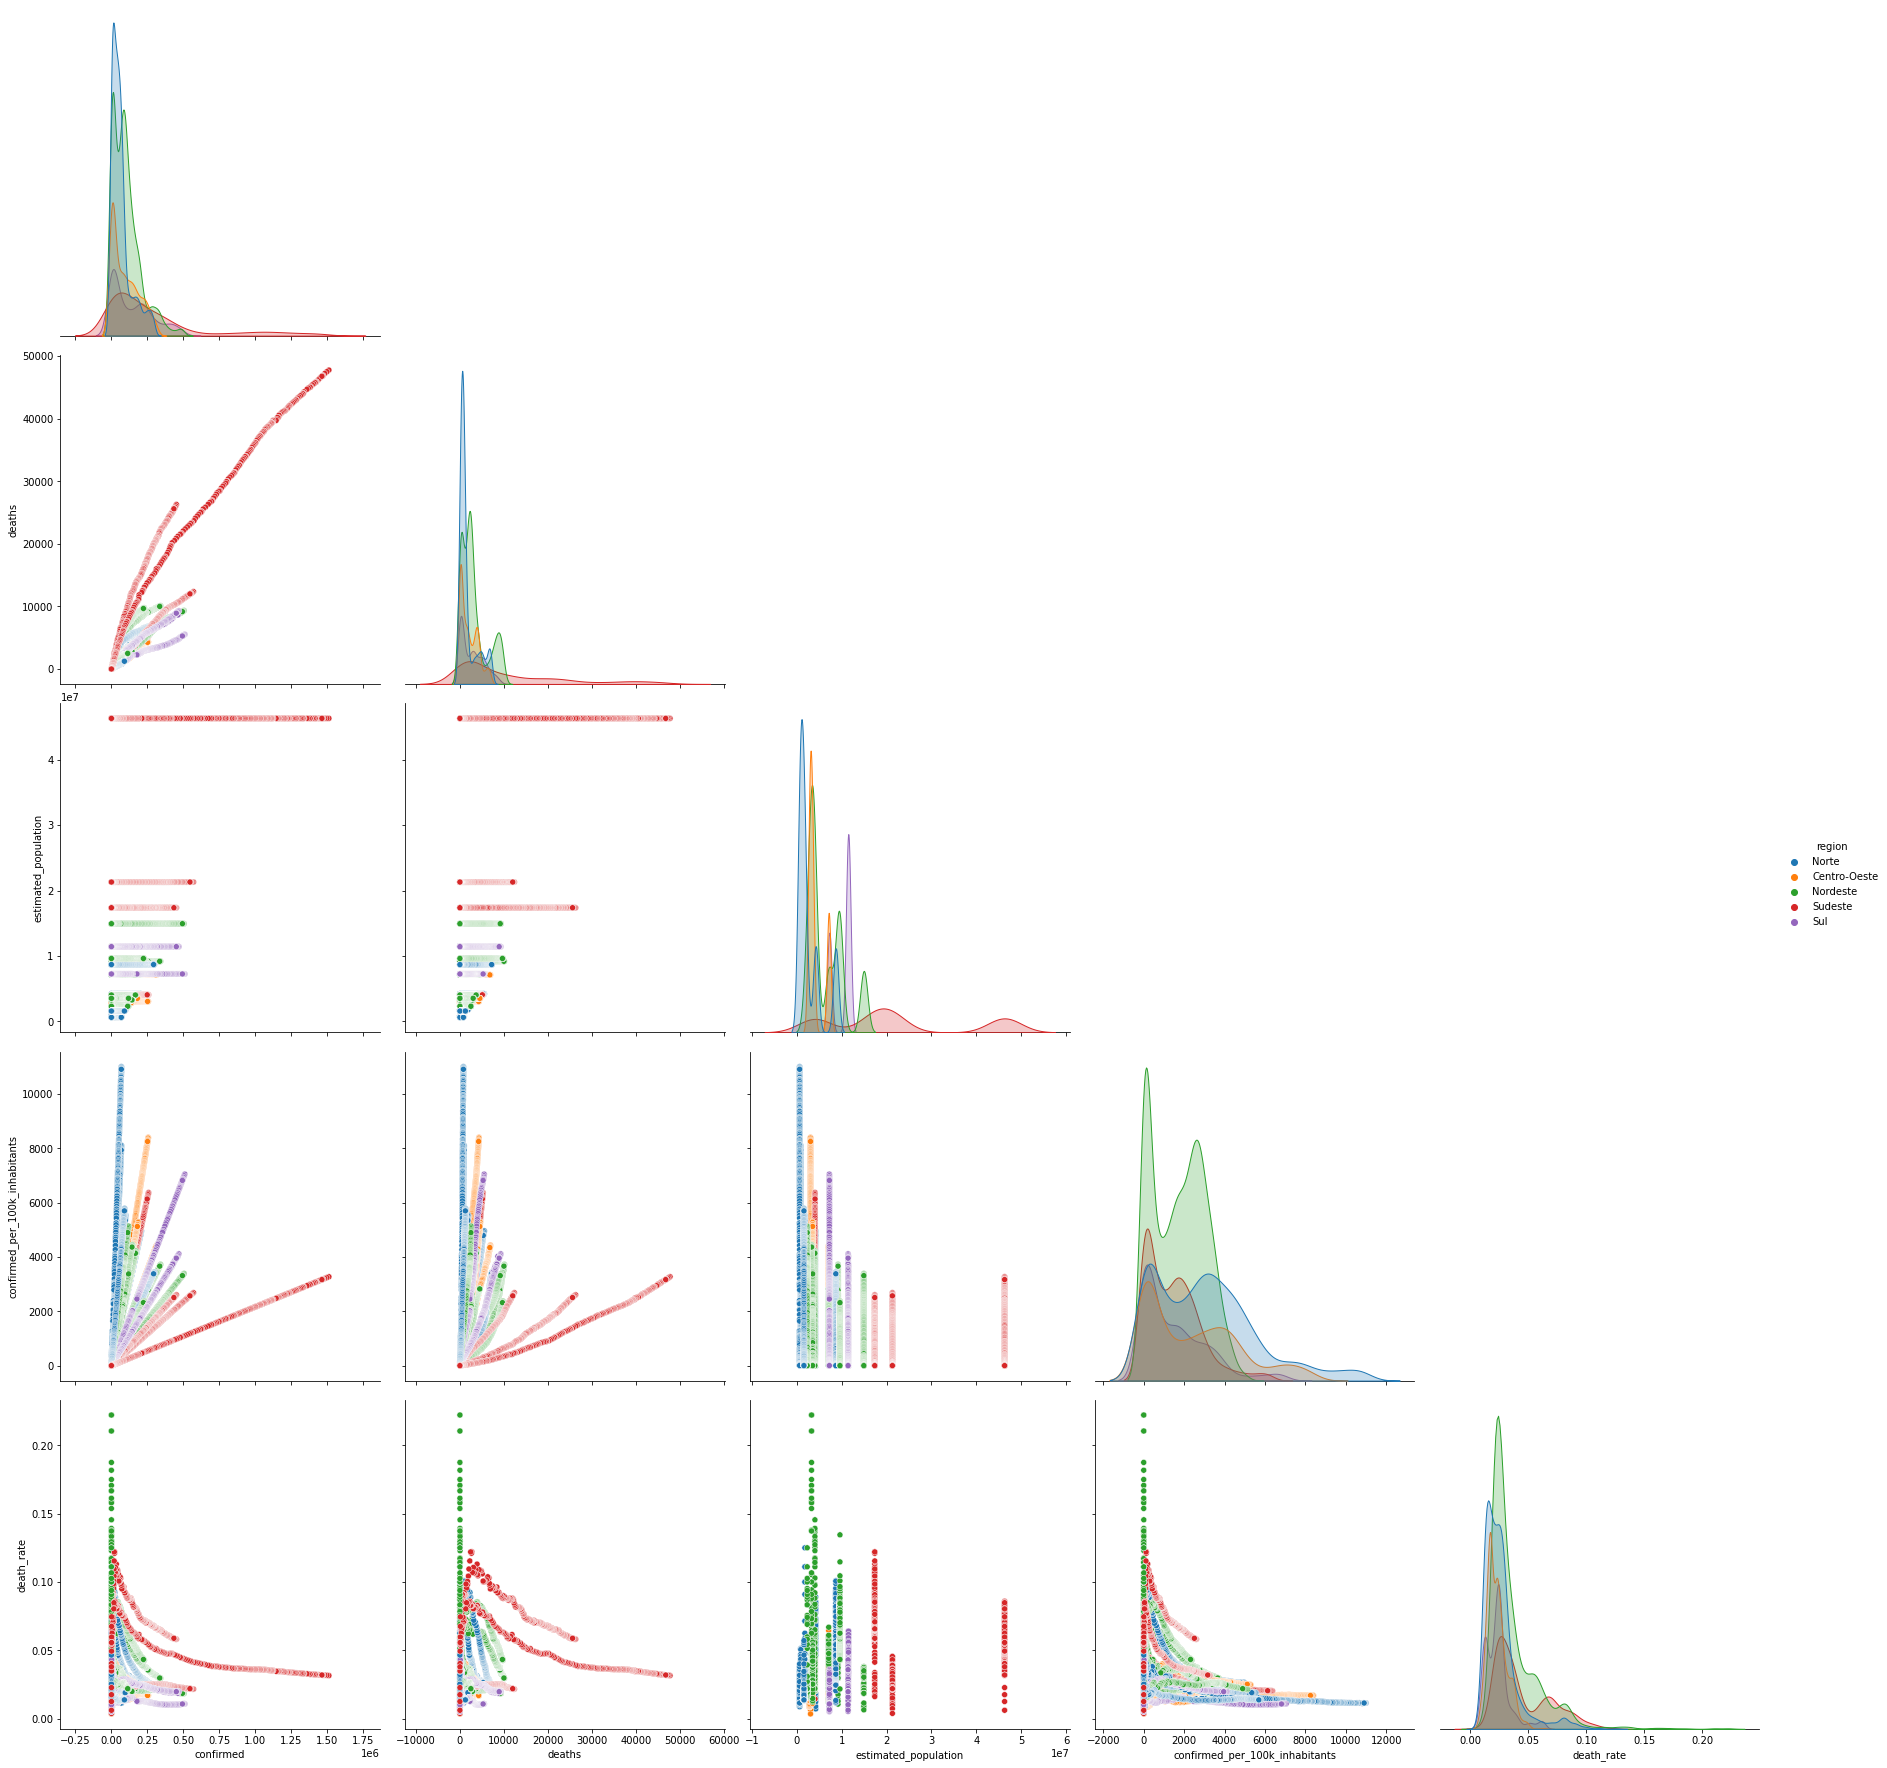

In [ ]:
aux = dataCorr[["confirmed", "deaths", "estimated_population", "confirmed_per_100k_inhabitants", "death_rate","state", "region"]]
sns.pairplot(aux[aux.death_rate > 0], hue="region", height=5, corner=True)

# Conclus√£o

As conclus√µes que alcancei foram bem simples e, de certa forma, √≥bvias. Infelizmente tive muita dificuldade em saber que tipo de informa√ß√µes seriam poss√≠veis de se obter do conjunto de dados que optei por trabalhar. Felizmente, os dados sobre covid-19 foram mais interessantes de se an√°lisar que os dados escolhidos e j√° citados na introdu√ß√£o.

Acredito que para chegar a informa√ß√µes mais interessantes e reveladores, o ideal seria alimentar esse trabalho com outros bancos de dados, com informa√ß√µes como IDH, densidade demogr√°fica, escolaridade e investimento em sa√∫de, por estado ou munic√≠pio. Creio que dessa forma, seria poss√≠vel tra√ßar correla√ß√µes molhores entre os resultados registrados em cada estado, nos ajudando a entender, por exemplo, o porqu√™ de alguns estados mesmo com uma popula√ß√£o absoluta menor alcan√ßou uma taxa de morte maior, relativo a centros mais populosos.



# D√∫vidas

Uma quest√£o que martelou minha cabela ao longo do desenvolvimento dessa pesquisa foi: como posso fazer perguntas mais interessantes e chegar a informa√ß√µes mais √∫teis, mesmo quando minha fonte de dados √© *'simples'*? Ou ser√° que estou sendo ing√™nuo ao desejar tirar conclus√µes extraordin√°rias de um conjunto de dados como o de covid-19 utilizado nesse tarbalho?
 